# Dask arrays

In [1]:
import numpy as np
import dask.array as da

Let's create a random dask array, do some operation and visualize it:

In [2]:
x = da.random.random((2000, 2000), chunks=(500, 500))
x

dask.array<random_sample, shape=(2000, 2000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

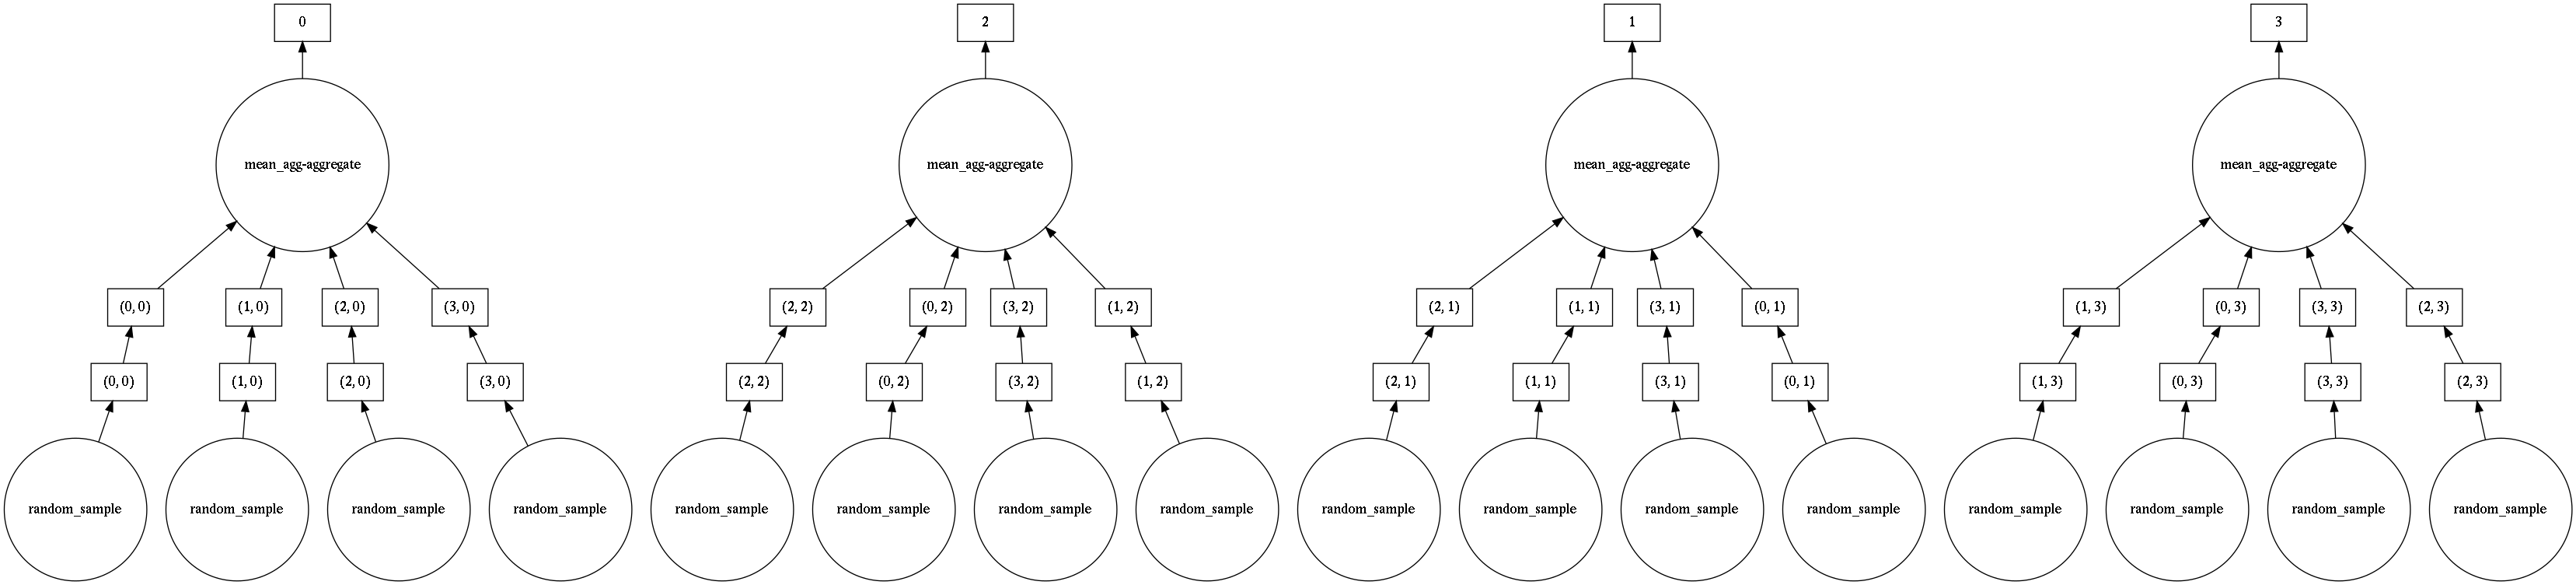

In [3]:
y = x.mean(axis=0)
y.visualize(optimize_graph=True)

Let's increase the size of the array and run the operation.

In [6]:
%%time
x = da.random.random((20000, 20000))
y = x.mean(axis=0)
y.compute().shape

CPU times: user 6.32 s, sys: 1.82 s, total: 8.14 s
Wall time: 588 ms


(20000,)

Let's compare the results with NumPy:

In [7]:
%%time 
x = np.random.random((20000, 20000))
y = x.mean(axis=0)
y.shape

CPU times: user 3.53 s, sys: 1.04 s, total: 4.57 s
Wall time: 4.56 s


(20000,)

Let's consider now the operation `x.dot(x)`. <mark> Question </mark> Could you explain the results of the timings?

In [9]:
%%time 
x = np.random.random((20000, 20000))
y = x.dot(x)
y.shape

CPU times: user 10min 25s, sys: 2.36 s, total: 10min 27s
Wall time: 23.1 s


(20000, 20000)

In [5]:
%%time
x = da.random.random((20000, 20000))
y = x.dot(x)
y.compute().shape